In [4]:
import pandas as pd 

In [5]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [6]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_25988\4229893874.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_25988\4229893874.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [7]:
print(face_emotions)

                   time face_emotion
0   2024-04-24 20:06:12      neutral
1   2024-04-24 20:06:17        happy
2   2024-04-24 20:06:17      neutral
3   2024-04-24 20:06:19        happy
4   2024-04-24 20:06:20        happy
..                  ...          ...
71  2024-04-24 20:07:14        happy
72  2024-04-24 20:07:15          sad
73  2024-04-24 20:07:18      neutral
74  2024-04-24 20:07:19      neutral
75  2024-04-24 20:07:20      neutral

[76 rows x 2 columns]


In [8]:
print(voice_emotions)

                  time voice emotion
0  2024-04-24 20:06:22           sad
1  2024-04-24 20:06:31           sad
2  2024-04-24 20:06:40           sad
3  2024-04-24 20:06:48           sad
4  2024-04-24 20:06:57           sad
5  2024-04-24 20:07:06           sad
6  2024-04-24 20:07:14           sad
7  2024-04-24 20:07:23           sad
8  2024-04-24 20:07:32           sad


In [9]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-24 20:06:12      neutral           NaN
2024-04-24 20:06:17        happy           NaN
2024-04-24 20:06:17      neutral           NaN
2024-04-24 20:06:19        happy           NaN
2024-04-24 20:06:20        happy           NaN
...                          ...           ...
2024-04-24 20:07:18      neutral           NaN
2024-04-24 20:07:19      neutral           NaN
2024-04-24 20:07:20      neutral           NaN
2024-04-24 20:07:23          NaN           sad
2024-04-24 20:07:32          NaN           sad

[78 rows x 2 columns]


In [10]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                   time face_emotion voice emotion
0   2024-04-24 20:06:12      neutral           NaN
1   2024-04-24 20:06:17        happy           NaN
2   2024-04-24 20:06:17      neutral           NaN
3   2024-04-24 20:06:19        happy           NaN
4   2024-04-24 20:06:20        happy           NaN
..                  ...          ...           ...
73  2024-04-24 20:07:18      neutral           NaN
74  2024-04-24 20:07:19      neutral           NaN
75  2024-04-24 20:07:20      neutral           NaN
76  2024-04-24 20:07:23      neutral           sad
77  2024-04-24 20:07:32          NaN           sad

[78 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_25988\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [11]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

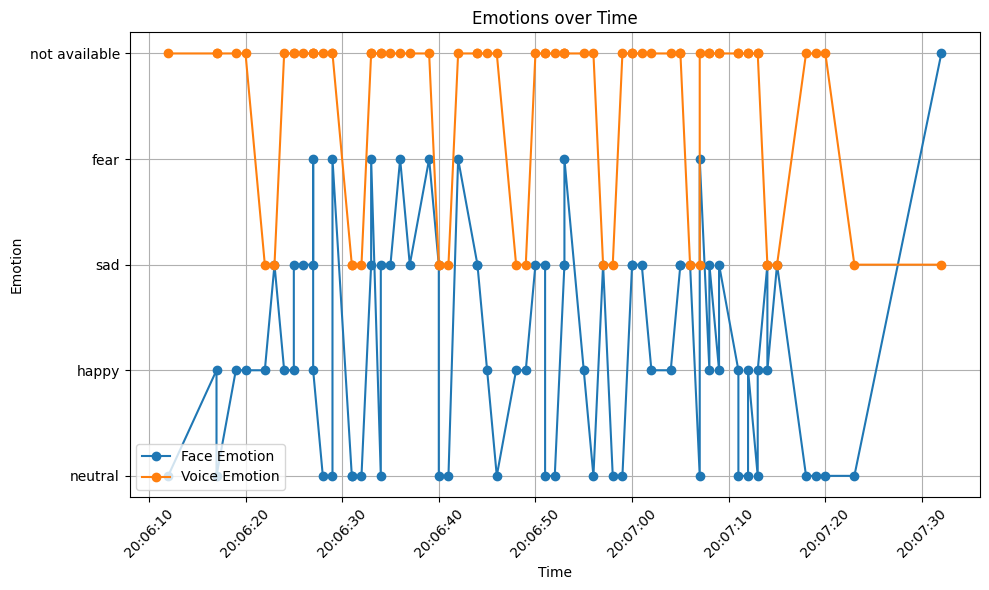

In [12]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-24 20:06:12        neutral  not available
2024-04-24 20:06:17          happy  not available
2024-04-24 20:06:17        neutral  not available
2024-04-24 20:06:19          happy  not available
2024-04-24 20:06:20          happy  not available
...                            ...            ...
2024-04-24 20:07:18        neutral  not available
2024-04-24 20:07:19        neutral  not available
2024-04-24 20:07:20        neutral  not available
2024-04-24 20:07:23        neutral            sad
2024-04-24 20:07:32  not available            sad

[78 rows x 2 columns]


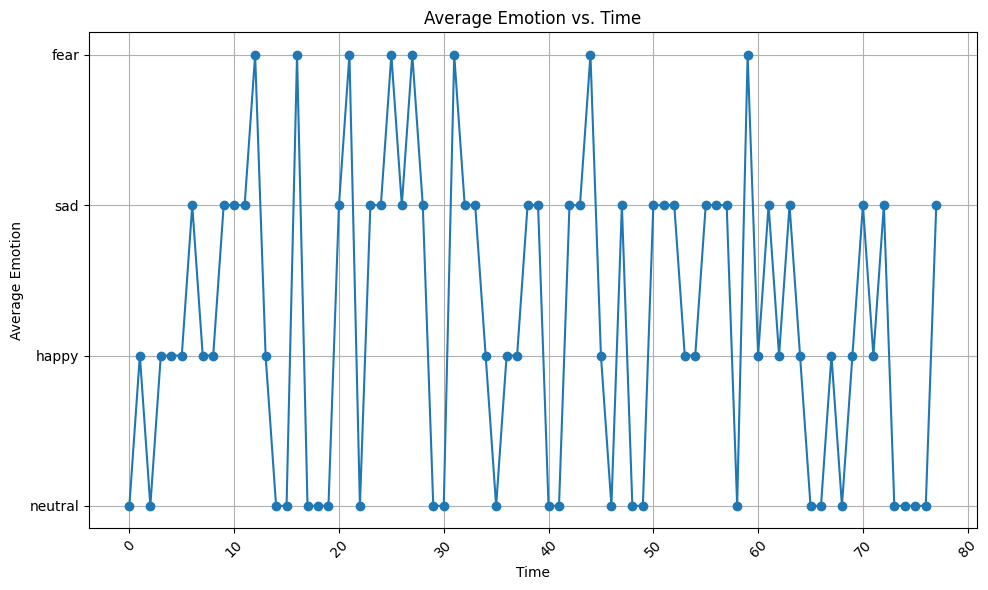

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-24 20:06:12,neutral,not available,neutral
1,2024-04-24 20:06:17,happy,not available,happy
2,2024-04-24 20:06:17,neutral,not available,neutral
3,2024-04-24 20:06:19,happy,not available,happy
4,2024-04-24 20:06:20,happy,not available,happy
...,...,...,...,...
73,2024-04-24 20:07:18,neutral,not available,neutral
74,2024-04-24 20:07:19,neutral,not available,neutral
75,2024-04-24 20:07:20,neutral,not available,neutral
76,2024-04-24 20:07:23,neutral,sad,neutral


In [16]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: sad


In [17]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
sad : 27
neutral : 24
happy : 19
fear : 8
